<a href="https://colab.research.google.com/github/bartolomeoadrian/computational-vision/blob/main/06_3d_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de *Librerías*

In [1]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lectura y Despliegue de Imagen


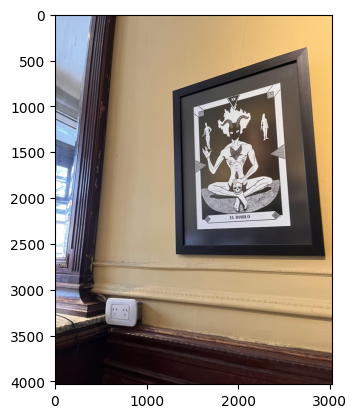

In [32]:
image_url = 'https://raw.githubusercontent.com/bartolomeoadrian/computational-vision/refs/heads/main/assets/images/devil.jpg'

# Download the image
response = requests.get(image_url)
with open('devil.jpg', 'wb') as f:
    f.write(response.content)

# Read the image using cv2.imread
img = cv2.imread('devil.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# Funciones para la homografía

In [40]:
#Creo la funcion para la rotacion de la matriz, es decir, de la imagen.
def rotation_matrix_2d(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
  return R

#Creo la funcion de homografia y le paso por parametro la imagen X
#y los valores de rotacion traslacion y escalamiento
#en forma de matriz H
def homography(X,H):
  Hinv  = np.linalg.inv(H)
  #Xp    = np.zeros((N,M),np.uint8) # Original line for grayscale

  # Get the dimensions of the input image
  N, M, channels = X.shape

  # Initialize Xp as a color image with the same number of channels as X
  Xp    = np.zeros((N,M, channels), dtype=np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        # Copy the color values from X to Xp
        Xp[i,j,:] = X[ip[t],jp[t],:]
      t = t+1
  return Xp

# Homografía

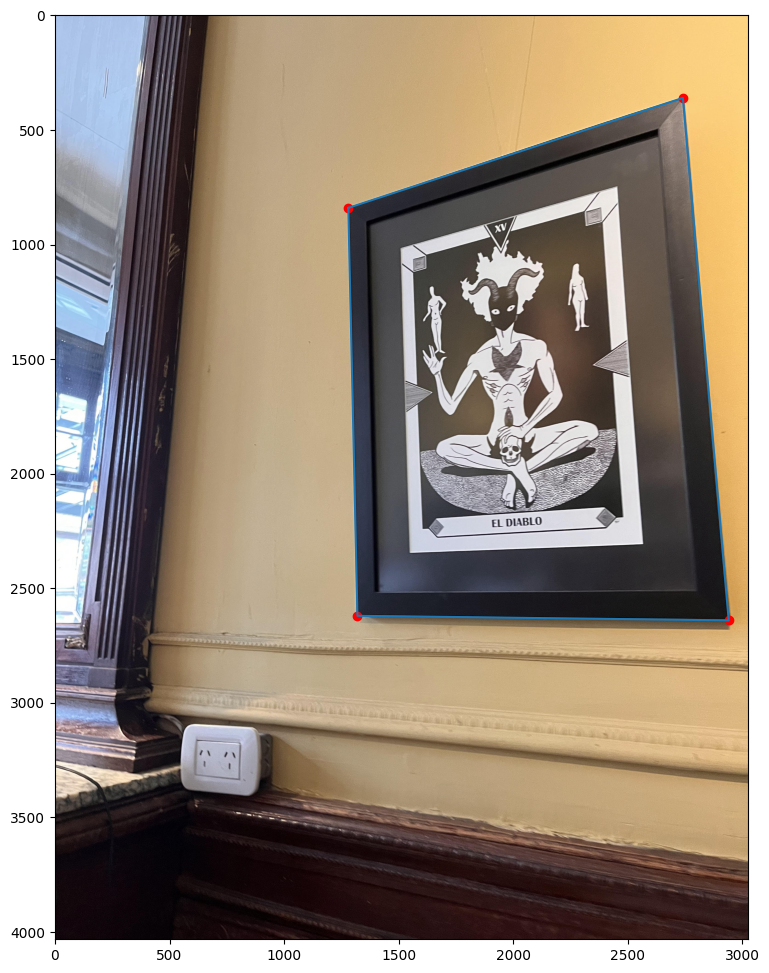

In [34]:
# Defino las coordenadas de las imagenes que quiero
# modificar
xp = np.array([1280,2740,1320,2940])
yp = np.array([840,360,2620,2640])
i = np.array([0,1,3,2,0])
plt.figure(figsize=(18,12))
plt.imshow(img_rgb)
plt.plot(xp[i],yp[i])
plt.scatter(xp,yp,c='red')
plt.show()

In [42]:
# Defino las coordenadas de la imagen final que quiero
x = np.array([20,3000,20,3000])
y = np.array([20,20,4000,4000])

In [43]:
# Creo la funcion para cambiar la imagen

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

mp  =  (array([1280, 2740, 1320, 2940]), array([ 840,  360, 2620, 2640]))
m   =  (array([  20, 3000,   20, 3000]), array([  20,   20, 4000, 4000]))
Estimacion de mp a partir de m:
mps =  (array([1280.        , 2739.99999961, 1320.00000014, 2939.99999996]), array([ 840.        ,  359.99999995, 2620.00000029, 2639.99999997]))
Imagen izquierda: Transformada                                | Imagen derecha: Original


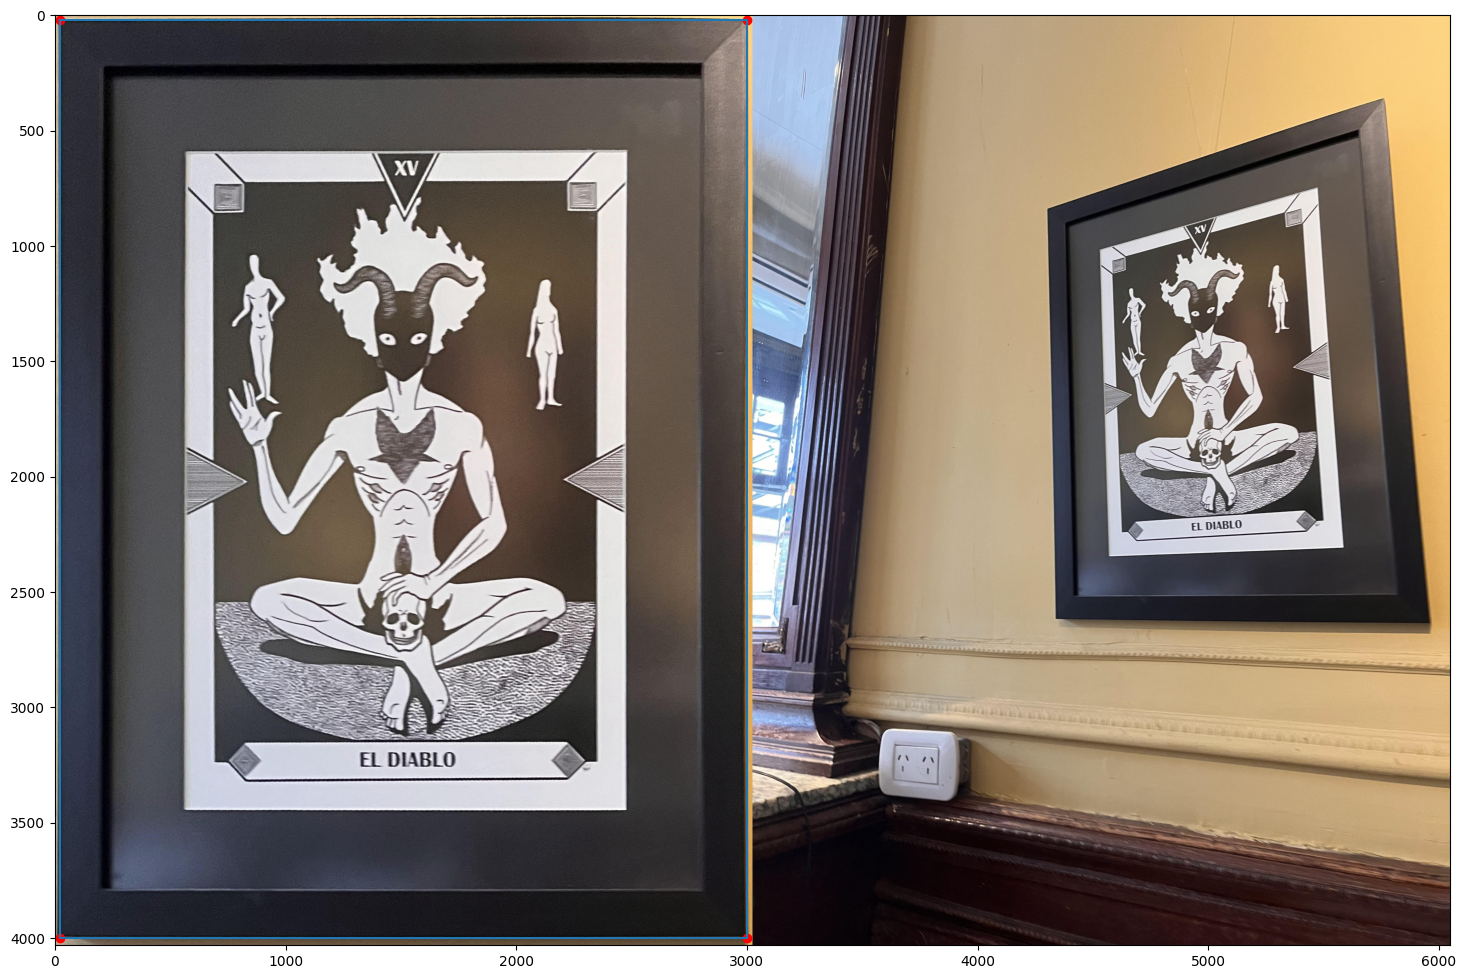

In [44]:
print('mp  = ', (xp,yp))
print('m   = ', (x,y))

mm = np.vstack([x, y, np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))
mmp = np.dot(H2,mm)
mmp = mmp/mmp[-1,:]

print('Estimacion de mp a partir de m:')
print('mps = ', (mmp[0,:],mmp[1,:]))

Hinv  = np.linalg.inv(H2)

Y = homography(img_rgb,Hinv)
Z = np.concatenate((Y,img_rgb),axis=1)

print('Imagen izquierda: Transformada                                | Imagen derecha: Original')
plt.figure(figsize=(18,24))
plt.imshow(Z)
plt.plot(x[i],y[i])
plt.scatter(x,y,c='red')
plt.show()
